### **Clone code về từ github**

In [ ]:
!git clone https://github.com/ToanLyHoa/DeepCCA


Cloning into 'DeepCCA'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 27 (delta 4), reused 23 (delta 2), pack-reused 0
Unpacking objects: 100% (27/27), done.


In [ ]:
cd DeepCCA

/content/DeepCCA


### **Chuẩn bị đầy đủ các thư viện**

In [ ]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import numpy as np
from linear_cca import linear_cca
from torch.utils.data import BatchSampler, SequentialSampler
from DeepCCAModels import DeepCCA
from main import Solver
from utils import load_data, svm_classify
try:
    import cPickle as thepickle
except ImportError:
    import _pickle as thepickle

import gzip
import numpy as np
torch.set_default_tensor_type(torch.DoubleTensor)

### **Tải dữ liệu về google colab**
### **Sau đó load vào data1 và data2**

In [ ]:
!gdown  https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view1.gz
!gdown  https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view2.gz
data1 = load_data('noisymnist_view1.gz')
data2 = load_data('noisymnist_view2.gz')

Downloading...
From: https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view1.gz
To: /content/DeepCCA/noisymnist_view1.gz
100% 88.9M/88.9M [00:07<00:00, 12.2MB/s]
Downloading...
From: https://www2.cs.uic.edu/~vnoroozi/noisy-mnist/noisymnist_view2.gz
To: /content/DeepCCA/noisymnist_view2.gz
100% 210M/210M [00:15<00:00, 13.7MB/s]
loading data ...
loading data ...


### **Set up mọi thứ trước khi đi qua SVM**

In [ ]:
train1, train2 = data1[0][0], data2[0][0]
val1, val2 = data1[1][0], data2[1][0]
test1, test2 = data1[2][0], data2[2][0]

new_data = []
# print(outputs)
for idx in range(3):
    new_data.append([data1[idx][0], 0, data1[idx][1]])

### **Tiến hành thực nghiệm mô hình SVM**

In [ ]:
import time
start = time.time()
# Training and testing of SVM with linear kernel on the view 1 with new features
[test_acc, valid_acc, train_acc] = svm_classify(new_data, C=0.01)
end = time.time()
print('SVM time:', end - start)
print("Accuracy on view 1 (train data) is:", train_acc * 100.0)
print("Accuracy on view 1 (validation data) is:", valid_acc * 100.0)
print("Accuracy on view 1 (test data) is:", test_acc*100.0)


training SVM...
SVM time: 24.17841410636902
Accuracy on view 1 (train data) is: 81.098
Accuracy on view 1 (validation data) is: 81.75
Accuracy on view 1 (test data) is: 81.14


### **Demo kết quả**

PREDICTION:  6


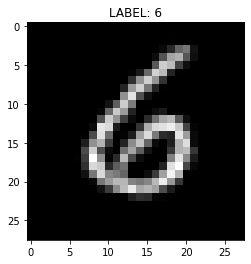

PREDICTION:  5


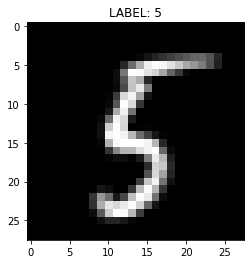

PREDICTION:  8


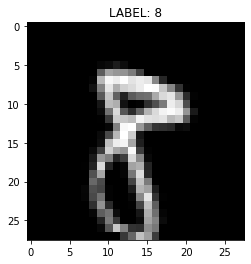

PREDICTION:  4


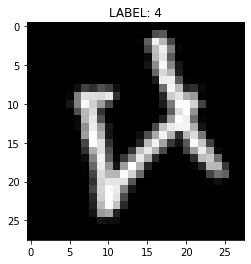

PREDICTION:  6


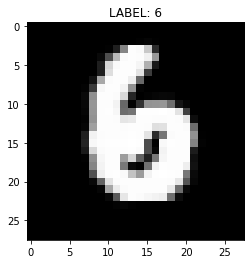

In [ ]:
import matplotlib.pyplot as plt
import keras, random, math
#pick random pictures
num = math.ceil(random.uniform(1,9995))
label = data1[2][1]
for i in range(num, num+5):
    print('PREDICTION: ', label[i])
    plt.title('LABEL: {label}'.format(label=label[i]))
    temp = test1[i].numpy() 
    temp = np.reshape(temp, (28,28), order='F')
    plt.imshow(temp, cmap='gray')
    plt.show()